In [19]:
# 📌 4_feature_selection.ipynb - Feature Selection using Chi-Square

import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Load the encoded dataset (from the correlation step)
data = pd.read_csv('data/encoded_data.csv')  # Replace with your actual file path

In [20]:
data.head()

,ROAD_CLASS_Expressway,ROAD_CLASS_Expressway Ramp,ROAD_CLASS_Laneway,ROAD_CLASS_Local,ROAD_CLASS_Major Arterial,ROAD_CLASS_Major Arterial,ROAD_CLASS_Major Shoreline,ROAD_CLASS_Minor Arterial,ROAD_CLASS_Other,ROAD_CLASS_Pending,...,DIVISION_D33,DIVISION_D41,DIVISION_D42,DIVISION_D43,DIVISION_D51,DIVISION_D52,DIVISION_D53,DIVISION_D55,DIVISION_NSA,INJURY_NUM
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3


In [21]:
# Define X (features) and y (target)
X = data.drop(columns=['INJURY_NUM'])  # INJURY_NUM is the numeric target
y = data['INJURY_NUM']

In [22]:
# Apply Chi-Square Feature Selection
selector = SelectKBest(score_func=chi2, k=20)  # Select top 20 features
X_selected = selector.fit_transform(X, y)

In [23]:
# Random Forest feature selector
rf_selector = RandomForestClassifier(random_state=42)
rf_selector.fit(X, y)

RandomForestClassifier(random_state=42)

In [24]:
# Select important features
selector = SelectFromModel(rf_selector, prefit=True)
X_selected = selector.transform(X)

C:\Users\mulla\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [25]:
# Get importances
importances = rf_selector.feature_importances_

In [26]:
importances

array([2.36491752e-03, 1.94907053e-04, 3.19087961e-04, 4.65983177e-03,
       1.51795960e-02, 8.56607372e-05, 3.72725121e-04, 1.17113808e-02,
       2.61795534e-04, 3.10560522e-05, 1.32393999e-02, 1.24156700e-02,
       1.25368717e-02, 3.74060660e-03, 1.11715471e-02, 6.53216887e-04,
       1.32195985e-02, 3.09997464e-05, 9.52670670e-05, 1.91457288e-04,
       2.21709179e-06, 1.26844334e-04, 1.25729880e-03, 5.58017019e-06,
       1.84587217e-04, 8.79364717e-03, 2.65868287e-05, 1.20209014e-03,
       2.19498731e-04, 2.25610676e-02, 4.67852951e-04, 3.63258276e-04,
       7.13295958e-04, 8.38417685e-04, 1.09567473e-03, 9.63334663e-03,
       3.55878881e-03, 3.16545348e-05, 1.67149267e-02, 1.79953445e-03,
       1.34652497e-03, 2.49725586e-02, 1.52287950e-03, 2.96621416e-03,
       1.91539178e-03, 1.24432202e-04, 1.50751499e-03, 2.01464088e-04,
       2.12874835e-03, 1.56374005e-03, 6.63684091e-04, 1.31072020e-03,
       3.00964522e-06, 1.56098614e-02, 1.14985196e-01, 5.48213818e-04,
      

In [27]:
# Get all feature names from binary-encoded data
feature_names = X.columns

In [28]:
# Create a DataFrame with feature names and their importance scores
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})


In [37]:
# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# View top N features
print(importance_df.head(15))  # Show top 10

                             Feature  Importance
54          ACCLASS_Non-Fatal Injury    0.114985
41                    LIGHT_Daylight    0.024973
75                 INVTYPE_Passenger    0.024412
59   IMPACTYPE_Pedestrian Collisions    0.024373
29           TRAFFCTL_Traffic Signal    0.022561
85                   INVAGE_20 to 24    0.016754
38            LIGHT_Dark, artificial    0.016715
86                   INVAGE_25 to 29    0.016224
103                    INITDIR_North    0.016173
76                INVTYPE_Pedestrian    0.016171
106                     INITDIR_West    0.016094
53                      RDSFCOND_Wet    0.015610
66                    INVTYPE_Driver    0.015421
4          ROAD_CLASS_Major Arterial    0.015180
104                    INITDIR_South    0.014955


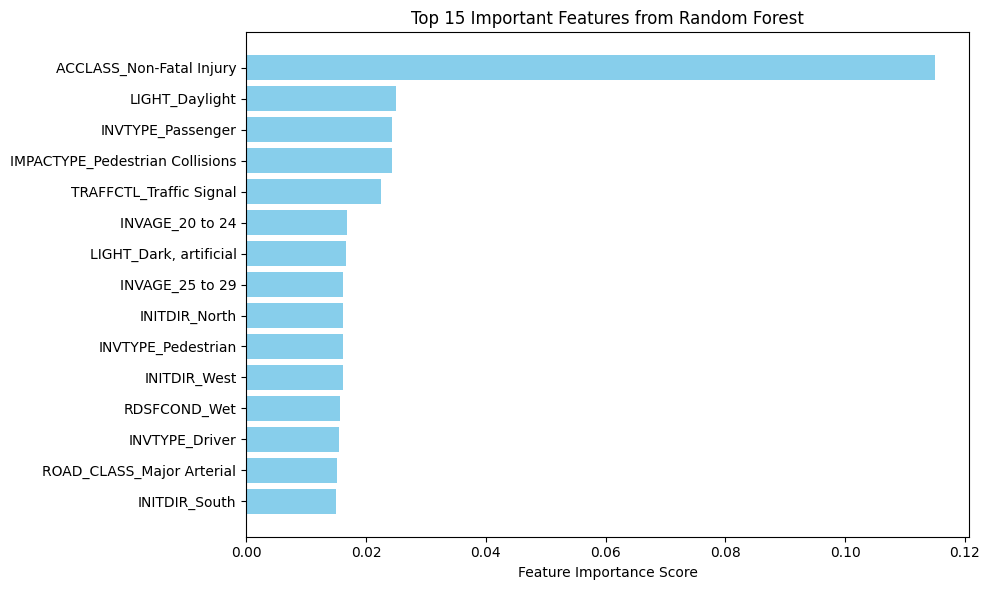

In [36]:
import matplotlib.pyplot as plt

# Plot top 15 important features
top_n = 15
top_features = importance_df.head(top_n)

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Highest at top
plt.title(f'Top {top_n} Important Features from Random Forest')
plt.xlabel('Feature Importance Score')
plt.tight_layout()
plt.show()



✅ Top 15 features selected by Chi-Square Test:
ACCLASS_Non-Fatal Injury: 890.22
IMPACTYPE_Approaching: 407.21
IMPACTYPE_Cyclist Collisions: 244.53
IMPACTYPE_Pedestrian Collisions: 515.18
IMPACTYPE_Rear End: 256.41
IMPACTYPE_Turning Movement: 189.47
INVTYPE_Driver: 186.98
INVTYPE_Motorcycle Driver: 155.78
INVTYPE_Passenger: 1035.66
INVTYPE_Pedestrian: 1000.26
INVTYPE_Vehicle Owner: 385.96
INVAGE_80 to 84: 157.88
INVAGE_85 to 89: 215.77
INVAGE_unknown: 483.45
DRIVCOND_Unknown: 155.86


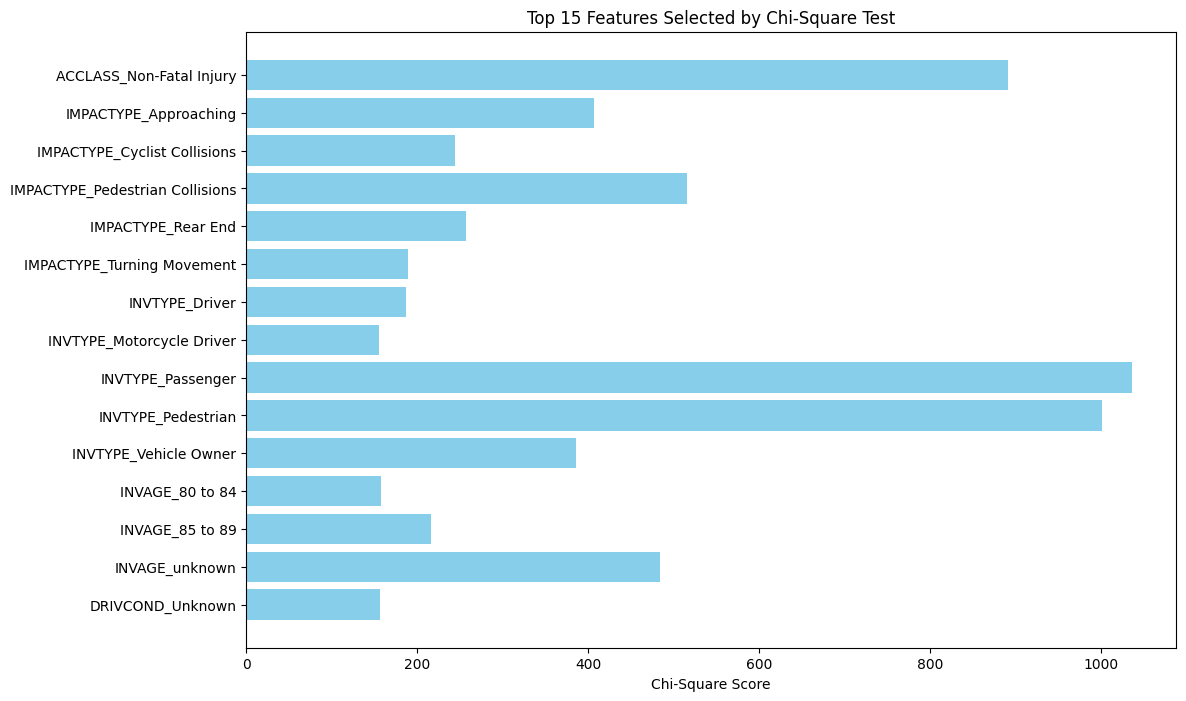

In [39]:
selector = SelectKBest(score_func=chi2, k=15)
selector.fit(X, y)

# Get the names and scores of selected features
selected_feature_names = X.columns[selector.get_support()]
selected_feature_scores = selector.scores_[selector.get_support()]

# Display selected features
print("\n✅ Top 15 features selected by Chi-Square Test:")
for name, score in zip(selected_feature_names, selected_feature_scores):
    print(f"{name}: {score:.2f}")

# Plot feature scores
plt.figure(figsize=(12, 8))
plt.barh(selected_feature_names, selected_feature_scores, color='skyblue')
plt.xlabel('Chi-Square Score')
plt.title('Top 15 Features Selected by Chi-Square Test')
plt.gca().invert_yaxis()
plt.show()


In [35]:
common_features = list(set(selected_feature_names) & set(feature_names))
print("✅ Common Features:\n", common_features)


✅ Common Features:
 ['DRIVCOND_Unknown', 'INVTYPE_Driver', 'IMPACTYPE_Rear End', 'INVTYPE_Pedestrian', 'INVAGE_85 to 89', 'INVTYPE_Motorcycle Driver', 'INVTYPE_Vehicle Owner', 'ACCLASS_Non-Fatal Injury', 'IMPACTYPE_Approaching', 'IMPACTYPE_Turning Movement', 'INVAGE_unknown', 'INVTYPE_Passenger', 'INVAGE_80 to 84', 'IMPACTYPE_Cyclist Collisions', 'IMPACTYPE_Pedestrian Collisions']
